# The Cross-Entropy Method

The cross-entropy method falls into the model-free and policy-based category of methods

All the methods in RL can be classified into various aspects:

1. Model-free or model-based

2. Value-based or policy-based

3. On-policy or off-policy

## Model-free

The method doesn't build a model of the environement or the reward it just directly connects observations to actions or values that are related to the actions. 

The agent takes current observations and does some computations on them, and the result is the action that it should take next. 

## Model-based

These methods try to predict the next observation or reward will be or both of them. 

Based on this predictions the agent tries to choose the best possible action to take, very often making such predictions multiple times to look more and more steps into the future. 

Pure model-based methods are used in deterministic environments such as board games with strict rules.

Model-free methods are usually easier to train as it's hard to build a good model of complex environments with rich observations. 

## Policy-based 

These methods approximate the policy of the agent, that is, what actions should carry out at every step. The policy is usually represented by a probabiltity distribution over the available actions. 

## Value-based 

Instead of the probability of an action this method calculates the value of every possible action and chooses the action with the best value. 

## off-policy 

The ability of the method to learn on historical data which is obtained by a previous version of the agent, recorded by human demostration or just seen by the same agent several episodes ago.

**Cross-entropy method is a model-free, policy-base and on-policy**

1. It doesnt build any model of the environment it just says to the agent what to do at every step

2. It approximates the policy of the agent

3. It requires fresh data obtained from the environemnt





# The cross-entropy method in practice

We follow a common machine learning approach and replace the complications of the agent with some kind of nonlinear trainable function which maps the observations from the environment to some output. As the cross-entropy method is policy-based we will produce a policy which basically says for every observation which action the agent should take. 

The policy is usually represented with a probability distribuition over the actions which makes it similar to a classification problem where the number of classes is instead replaced with the number of actions the agent can take. 
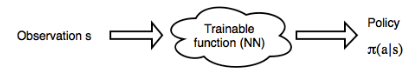

This abstraction makes the agent very simple: it needs to pass an observation from the environment to the NN, get a probability distribution over actions,and perform random sampling using the probability distribution to get an action to carry out. 

This random sampling adds randomness to our agent, which is a good thing, as at the beginning of the training, when our weights are random, the agent behaves randomly. After the agent gets an actio to issue, it fires the action to the environment and obtains the next observation and reward for the last action. Then the loop continues. 

During the agent's lifetime, its experience is presented as episodes. Every episode is a sequence of observations that the agent has got from the environment, actions it has issued, and rewards for these actions. Imagine that our agent has played several such episodes. For every episode, we can calculate the toal reward that the agent has claimed. It can be discounted or not discountedl; for simplicity, let's assume a discount of 1 is used. This means just a sum of all local rewards for every episode. This total reward shows hod good this episode was for the agent. 

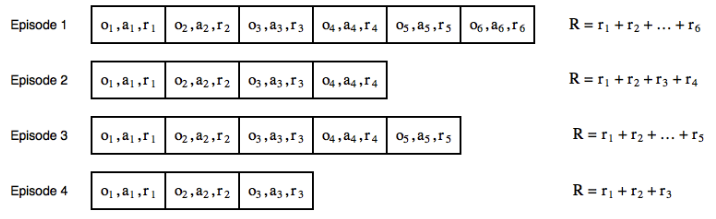

Every cell in each episode represents the agents steps.

Due to the randomness in the environment some actions will be better than the others. The core of cross-entropy method is to throw away bad episodes and train on better ones. 

Steps of cross-entropy:

1. Play *N* number of episodes using the current model and environement

2. Calculate the total reward for every episode and choose a reward boundary. Usually, this is  the percentile of all rewards such as 50th or 70th.

3. Throw away all the episodes with a reward below the boundary. 

4. Train on the remaining elite episodes using observations as the input and issued actions as the desired output. 

5. Repeat from step 1 until we become satisfied with the result. 



# Issues with the cross-entropy method for FrozenLake env

When compared to the CartPole example where every step of the environment gives us the rewards of 1.0 until the moment that the poloie falls. So the longer our agent balanced the pole the more reward iut obtained. This gives us a pretty normal distribution of the episdoes rewards. 

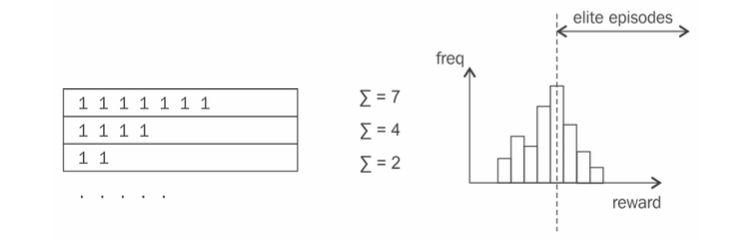

In the FrozenLake env we get the rewards in a different manner. We get the reward of 1.0 only when we reach the goal, and thios reward says nothing about how good each episode was. It is just 1.0 and that is it with no indication of how long the episode lasted or was it quick etc. 

The distribution of the rewards is also problematic where there are only two kind of episodes possible with zero reward and one reward. 

Failed episodes will obviously dominate in the beginning of the training. 

So the percentile of selection of elite episodes is totally wrong and gives us bad examples to train on

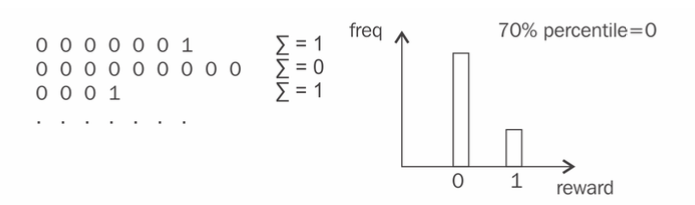

## Limitation of cross-entropy

1. For training our episodes have to be finite and preferably short

2. The total reward for the episodes should have enough variability to separate good episodes from the bad ones

3. There is no intermediate indication about whether the agent has succeeded or not. 

## Ways to solve the issues in the FrozenLake example

1. Larger episodes of played episodes 

2. Discount factor applied to the reward. A discount factor of 0.90 or 0.95 is appropriate for this where the reward for shorter episodes will be higher than the reward for longer episodes. This also increases the variability. 

3. Keeping "elite" episodes for a long time. Instead of sampling the elite episodes then throwing them away, we should treat them as rarer events and hold on to them for longer for example for several iterations to train on them.

4. Decreasing the learning rate. This will give the NN more time to average more training samples.'

5. Much longer training time. Due to the sparsity of the successfull episodes, and the random outcomes of the actions, it's much harder for the NN to get an idea of the best behavior to perform in any particula situation. 